
### **Netflix Movies & TV Shows - EDA Assignment**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
##Loading Dataset
df = pd.read_csv("netflix_titles.csv")

In [6]:
##Basic Data Understanding checking shape of the dataset and type of dataset also looking for first few rows and missing values
print(df.shape)
print(df.dtypes)
df.head()

(8807, 12)
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
##Cleaning Data dropping missing values where needed converting dates to datetime and handle NaN in country, director, and rating

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

# **How many total Movies vs TV Shows?**

In [16]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


/tmp/ipython-input-547816069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


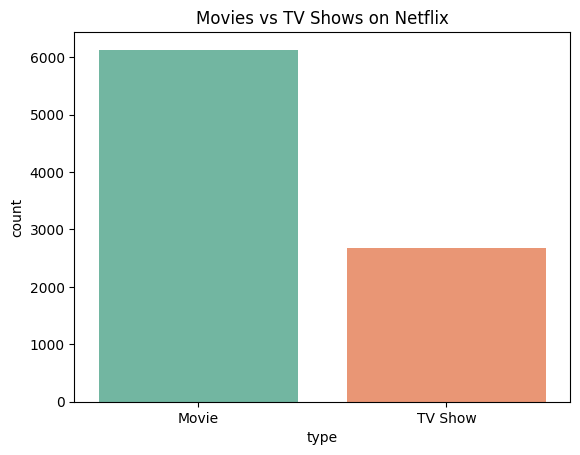

In [17]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Movies vs TV Shows on Netflix')
plt.show()


The bar shows there are significantly more movies in this dataset compare to TV shows

# **Top 10 countries producing Netflix content**

In [18]:
country_count = df['country'].value_counts().head(10)
country_count

,count
country,
United States,2818
India,972
Unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


Now we can see top ten countries producing most content now we will visualize it.

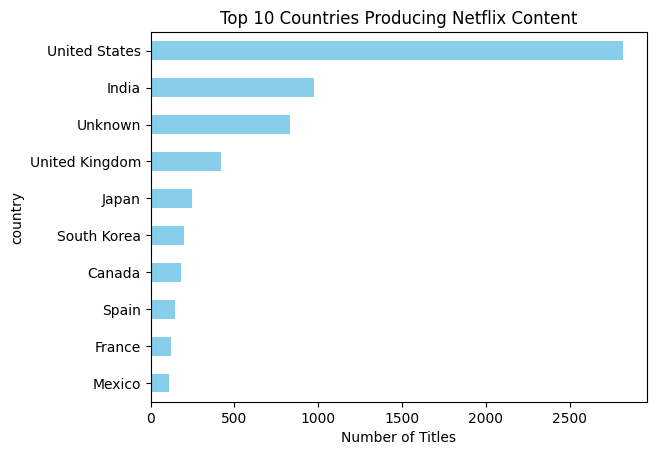

In [19]:
country_count.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.show()

We can see from this chart US is clearly ahead of most countries in producing most content.

# **Most common Genre**

In [21]:
from collections import Counter

genres = []
for val in df['listed_in'].dropna():
    genres.extend(val.split(', '))

genre_count = Counter(genres)
genre_count.most_common(1)


[('International Movies', 2752)]

# **Which years saw the highest number of releases?**

In [25]:
release_year_count = df['release_year'].value_counts().sort_index()
print(release_year_count)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


Now we can clearly see from this data that the year in which most number of release is 2018 now we will visualize it.

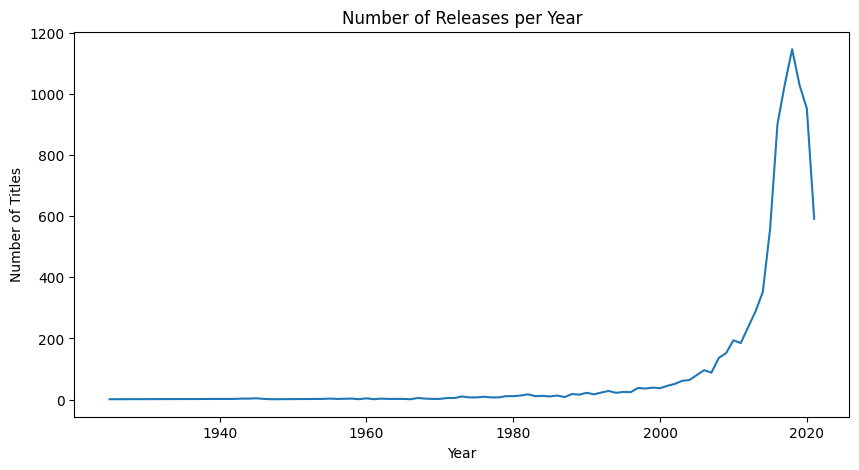

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x=release_year_count.index, y=release_year_count.values)
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


# **Distribution of content ratings**

In [27]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


We can see from this data that there are clearly more ratings in TV-MA now we will visualize it with pie chart

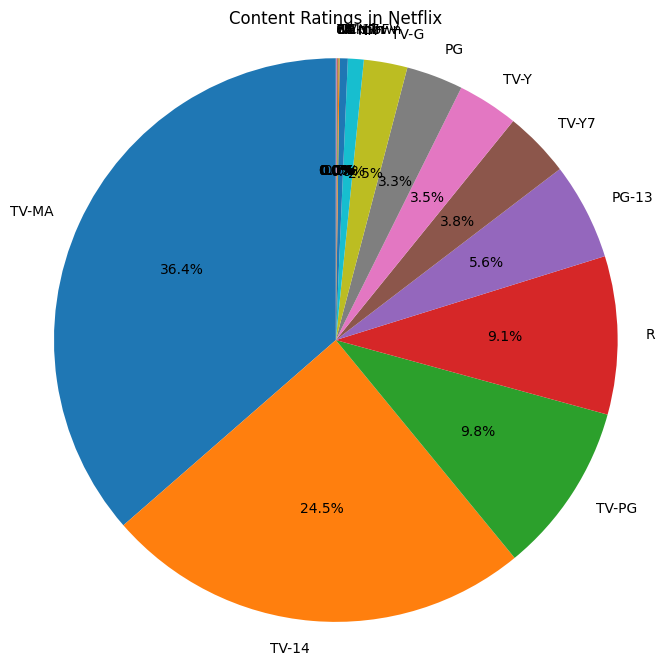

In [28]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Content Ratings in Netflix")
plt.axis('equal')
plt.show()

# **Which directors have the most titles?**

In [29]:
df['director'].value_counts().head(10)

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12


We can clearly see from this data that Rajiv Chilaka produced the most movies.

# **Now that we have completed the EDA what we did.**



*   Found how many total movies vs TV shows are in the dataset.
*   Found which are the top 10 countries producing Netflix content.

*   Found which years saw the highest number of releases.
*   Distribution of content ratings (G, PG, PG-13, TV-MA, etc.).

*   Found which directors have the most titles on Netflix.











